### iris datasets 활용 꽃잎 너비 예측 모델
- datasets: iris.csv에서 2개의 feature 사용
- 구현프레임워크: Pytorch

In [16]:
import pandas as pd
import torch                        # tensor
import torch.nn as nn               # ANN
import torch.nn.functional as F        # loss, activation, distance rtc function
import torch.optim as optimizer     # optimization

In [100]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [86]:
FILE_PATH = '../../EX_ML/data/iris.csv'

iris_df = pd.read_csv(FILE_PATH, usecols=[0, 1, 2, 3])
iris_df.head()

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [87]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


- learning method: supervised learning, regression
- learning algorithm: linear relation, linear model in nn.Linear

In [147]:
# in_features: petal.length
# out_teature: petal.width
torch.manual_seed(59)
model = nn.Linear(3, 1)

In [148]:
# weight & bais

for name, param in model.named_parameters():
    print(f"[{name}] {param}\n")

[weight] Parameter containing:
tensor([[ 0.0612,  0.5564, -0.0983]], requires_grad=True)

[bias] Parameter containing:
tensor([-0.3698], requires_grad=True)



- optimization instance
    - weight & bais optimaization

In [149]:
adam_op = optimizer.Adam(model.parameters(), lr=0.1)

- model learning
    - developer to do..?

- datasets to tensor: 데이터 준비 시 시행하거나 또는 학습 전에 진행

In [150]:
feature_ts = torch.from_numpy(iris_df[iris_df.columns[:-1]].values).float()
feature_ts.shape

torch.Size([150, 3])

In [151]:
label_ts = torch.from_numpy(iris_df[['petal.width']].values).float()
label_ts.shape

torch.Size([150, 1])

In [152]:
# train & test
X_train, X_test, y_train, y_test = train_test_split(feature_ts, label_ts, test_size=0.2)

# train & val
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

print(f"train: {X_train.shape}, test: {X_test.shape}, val: {X_val.shape}")
print(f"train: {y_train.shape}, test: {y_test.shape}, val: {y_val.shape}")

train: torch.Size([96, 3]), test: torch.Size([30, 3]), val: torch.Size([24, 3])
train: torch.Size([96, 1]), test: torch.Size([30, 1]), val: torch.Size([24, 1])


- model learning
    - epoch: 100, 학습 횟수지정
    - save learning result: loss_list = []

In [153]:
epochs = 50
loss_list = []

In [154]:
# test & validation function
# must not weight & bais update

def testing(test_ts, label_ts, kind='Val'):
    
    with torch.no_grad():
        
        pre_y = model(test_ts)
        
        # 오차계산: loss function
        loss = F.mse_loss(pre_y, label_ts)
        # loss_list.append(loss.item())
            
    return loss

In [155]:
# model learning function
def training(feature_ts, label_ts, val_feature_ts, val_label_ts, kind='Val'):
    loss_history = [[], []]
    
    for epoch in range(epochs+1):
        # 학습진행: forward
        pre_y = model(feature_ts)
        
        # 오차계산: loss function
        train_loss = F.mse_loss(pre_y, label_ts)
        loss_history[0].append(train_loss.item())
        
        # 최적화: optimization
        adam_op.zero_grad()
        train_loss.backward()
        adam_op.step()
        
        # validation
        val_loss = testing(val_feature_ts, val_label_ts, kind)
        loss_history[1].append(val_loss)
        
        # 학습결과
        if epoch%10 == 0:
            print(f"epoch: {epoch:5} loss: {train_loss.item():10.8f}")
            print(f"epoch: {epoch:5} {kind}_loss: {val_loss.item():10.8f}")
            
    return loss_history

In [156]:
loss = training(X_train, y_train, X_val, y_val)

epoch:     0 loss: 0.99946707
epoch:     0 Val_loss: 0.83645415
epoch:    10 loss: 0.07222796
epoch:    10 Val_loss: 0.04463271
epoch:    20 loss: 0.11251142
epoch:    20 Val_loss: 0.10223877
epoch:    30 loss: 0.05042241
epoch:    30 Val_loss: 0.02849901
epoch:    40 loss: 0.05219896
epoch:    40 Val_loss: 0.02707594
epoch:    50 loss: 0.04320991
epoch:    50 Val_loss: 0.03563426


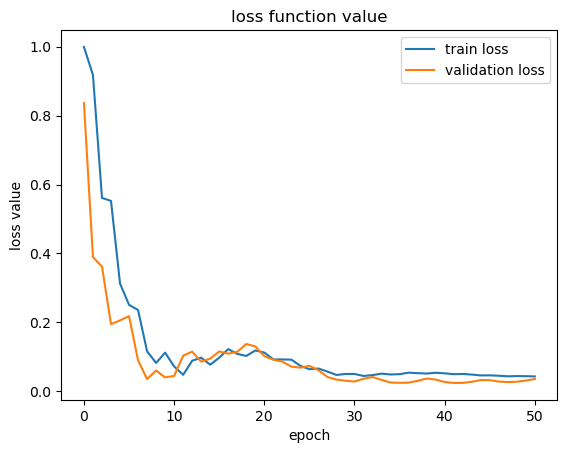

In [157]:
plt.plot(loss[0], label='train loss')
plt.plot(loss[1], label='validation loss')

plt.title('loss function value')
plt.xlabel('epoch')
plt.ylabel('loss value')
plt.legend()
plt.show()